# PRACTICAL CASE: COVID-19 Data

In the `data/in` folder there is a set of files related with COVID-19. The files are:
 - `epidemiology` - COVID-19 cases, deaths, recoveries and tests
 - `demographics.csv` - Various population statistics. The indicator are the most recent.
 - `health.csv` - Health indicators for the region
 - `hospitalizations.csv` - Information related to patients of COVID-19 and hospitals
 - `vaccinations.csv` - Trends in persons vaccinated and population vaccination rate regarding various Covid-19 vaccines.
 - `index.csv` - Various names and codes, useful for joining with other datasets
 
The ultimate goal is to build a **weekly covid-19 death predictor per country**. That is, with all provided information we should give a prediction about the number of deaths the next week, per country.

In this practice we're not focused on the prediction model but on the previous **data engineering process**, essential to uncover the particulaties of this data and essential to obtain an aggregated table of data that comprises all relevant information and provides the analytics team with a realiable starting point to the analytics part.

So, this practical case will be divided in two parts:


Data extracted from https://github.com/GoogleCloudPlatform/covid-19-open-data

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import os

"""
demographics = pd.read_csv("data/demographics.csv")
health = pd.read_csv("data/health.csv")
hospitalizations = pd.read_csv("data/hospitalizations.csv")
vaccinations = pd.read_csv("data/vaccinations.csv")
index = pd.read_csv("data/index.csv")
"""
epidemiology = pd.read_csv("data/epidemiology.csv")

epidemiology


,date,location_key,new_confirmed,new_deceased,new_recovered,new_tested,cumulative_confirmed,cumulative_deceased,cumulative_recovered,cumulative_tested
0,2020-03-15,DE_BB_12051,2.0,0.0,2.0,NaN,2.0,0.0,2.0,NaN
1,2020-03-17,DE_BB_12051,1.0,0.0,1.0,NaN,3.0,0.0,3.0,NaN
2,2020-03-19,DE_BB_12051,2.0,0.0,2.0,NaN,5.0,0.0,5.0,NaN
3,2020-03-20,DE_BB_12051,1.0,0.0,1.0,NaN,6.0,0.0,6.0,NaN
4,2020-03-22,DE_BB_12051,2.0,0.0,2.0,NaN,8.0,0.0,8.0,NaN
...,...,...,...,...,...,...,...,...,...,...
3161028,2022-05-09,US_WY_56045,0.0,0.0,NaN,NaN,1589.0,18.0,NaN,NaN
3161029,2022-05-10,US_WY_56045,-1.0,0.0,NaN,NaN,1588.0,18.0,NaN,NaN
3161030,2022-05-11,US_WY_56045,0.0,0.0,NaN,NaN,1588.0,18.0,NaN,NaN
3161031,2022-05-12,US_WY_56045,0.0,0.0,NaN,NaN,1588.0,18.0,NaN,NaN


In [ ]:
epidemiology

In [2]:
from pandas_profiling import ProfileReport



In [3]:
datasources = {source.replace(".zip",""): source for source in os.listdir("data/in") if source.endswith(".zip")}
datasources

{'demographics': 'demographics.zip',
 'epidemiology': 'epidemiology.zip',
 'health': 'health.zip',
 'hospitalizations': 'hospitalizations.zip',
 'index': 'index.zip',
 'vaccinations': 'vaccinations.zip'}

In [4]:
datasets= {}
for key,value in datasources.items():
    datasets[key]=pd.read_csv(f"data/in/{value}")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

KeyboardInterrupt: 

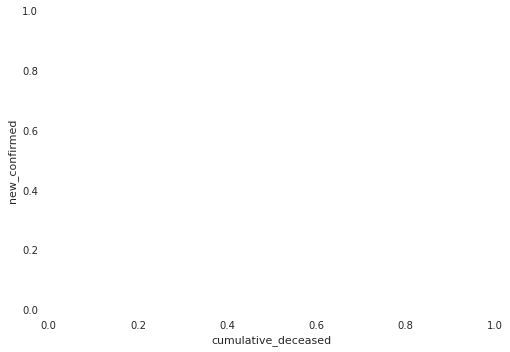

In [5]:
profile = ProfileReport(epidemiology)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

KeyboardInterrupt: 

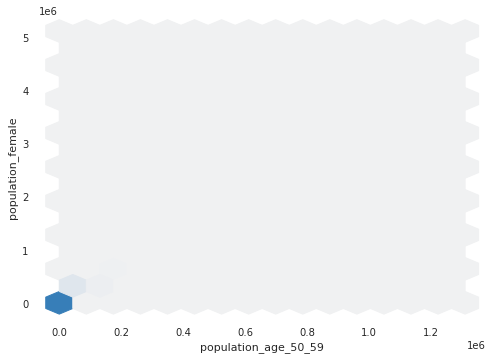

In [6]:
os.makedirs("data/profiling",exist_ok = True)
for key, value in datasets.items():
    profile= ProfileReport(value)
    profile.to_file(f"profiling{key}.html")

In [19]:
INPUT_FOLDER = "raw"
OUTPUT_FOLDER =  "preproc"

In [20]:
os.makedirs("data/preproc",exist_ok=True)

In [23]:
datasources = {source.replace(".zip",""): source for source in os.listdir(f"data/{INPUT_FOLDER}") if source.endswith(".zip")}
datasources

{'demographics': 'demographics.zip',
 'epidemiology': 'epidemiology.zip',
 'health': 'health.zip',
 'hospitalizations': 'hospitalizations.zip',
 'index': 'index.zip',
 'vaccinations': 'vaccinations.zip'}

In [7]:
data= data.fillna({
    "new_confirmed":0,
    "new_deceased":0
})

NameError: name 'data' is not defined

In [ ]:
data["week"]= pd.DatetimeIndex(data.date).to_period("W")
data["new_deceased_confirmed_ratio"]=data["new_deceased"]/data["new_confirmed"]

In [ ]:
data=data[["date","week","location_key","new_confirmed","new_deceased","new_deceased_confirmed_ratio"]]

In [ ]:
data.info(show_counts=True)

In [ ]:
data.to_csv(f"data/{OUTPUT_FOLDER}/{key}.zip", index=False)

In [ ]:
key="demographics"
data=pd.read_csv(f"data/{INPUT_FOLDER}/{key}.zip")
data.info(show_counts=True)

In [ ]:
data=data.filter(regex=r"(location_key|population$|population_age)")

In [ ]:
data.info(show_counts=True)

In [ ]:
data.to_csv(f"data/{OUTPUT_FOLDER}/{key}.zip", index=False)

## PART II: Exploratory Data Analysis

Explore data through an Exploratory Data Analysis process. Try to practice a little bit more with `plotly` package.

Some suggestions:
 1. Plot the series of new COVID-19 confirmed cases and deaths. Comment the results.
 1. Plot the cumulative series of new COVID-19 confirmed cases and deaths